In [30]:
#### Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import urllib
from urllib.request import urlopen
import json
import csv
# import simplejson
import pandas as pd
# import pytest
import base64
import sys
import glob
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
from bs4 import BeautifulSoup
import requests
from pprint import pprint
from ohmysportsfeedspy.v1_0 import API_v1_0
from ohmysportsfeedspy.v1_1 import API_v1_1
from ohmysportsfeedspy.v1_2 import API_v1_2
from ohmysportsfeedspy import MySportsFeeds
msf = MySportsFeeds(version="1.2")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [102]:
#Top 5 Teams Bar Chart
overall = "NFL_Standings/Overall/Overall_Standings_Combined.csv"
overall = pd.read_csv(overall)
overall.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)
overall.set_index("Season")
overall.head(8)
#Team Overall Standings/Stats by Season
# overall[["Season", "#Team Abbr."]]
# overall.groupby(x.index).sum()
# team = overall.groupby(["Season","#Team Abbr.", "#Rank", "#Wins", "#Losses"]).sum()
# list(conference.columns.values)
# team
# sptTotals = team[["#KB", "#KrRet", "#KrYds", "#KrAvg", "#KrLng","#KrTD", 
#                         "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 
#                         "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
#                         "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 
#                         "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",
#                         "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",
#                         "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", "#FgAtt50Plus",
#                         "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", "#XpAtt", 
#                         "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", "#KoYds",
#                         "#KoOOB", '#KoAvg', "#KoTB", "#KoRet", "#KoRetYds", 
#                         "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", "#Punts", 
#                         "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", "#PuntNetAvg", 
#                         "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", "#PuntIn20Pct", 
#                         "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", "#PuntRetYds", "#PuntRetAvg"
# ]]
# sptTotals.head()
# offTotals = overall[["#PassAttempts", "#PassCompletions", "#PassPct", "#PassAttemptsPerGame", 
#                         "#PassGrossYards", "#PassNetYards", "#PassYardsPerAtt", "#PassYardsPerGame", "#PassTD", "#PassTDPct", 
#                         "#PassInt", "#PassIntPct", "#PassLng", "#PassAvg", "#Pass20Plus", 
#                         "#Pass40Plus", "#PassSacks", "#PassSackY", "#QBRating", "#RushAttempts", 
#                         "#RushAttemptsPerGame", "#RushYards", "#RushAverage", "#RushYardsPerGame", "#RushTD", 
#                         "#RushLng", "#Rush1stDowns", "#Rush1stDownsPct", "#Rush20Plus", "#Rush40Plus", 
#                         "#RushFumbles", "#Receptions", "#RecYards", "#RecAverage", 
#                         "#RecYardsPerGame", "#RecTD", "#RecLng", "#Rec1stDowns", "#Rec20Plus", 
#                         "#Rec40Plus", "#RecFumbles"
#                        ]]
# offTotals.head()
# defTotals = team[["#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#SackYds", 
#                         "#TacklesForLoss", "#Interceptions", "#IntTD", "#IntYds", "#IntAverage", 
#                         "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#StuffYds",
#                         "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
#                         "#FumRecYds", "#FumTotalRec", "#FumTD"
# ]]
# defTotals.head()

,Season,#Team ID,#Team Abbr.,#Team City,#Team Name,#Rank,#GamesPlayed,#PassAttempts,#PassCompletions,#PassPct,#PassAttemptsPerGame,#PassGrossYards,#PassNetYards,#PassAvg,#PassYardsPerAtt,#PassYardsPerGame,#PassTD,#PassTDPct,#PassInt,#PassIntPct,#PassLng,#Pass20Plus,#Pass40Plus,#PassSacks,#PassSackY,#QBRating,#RushAttempts,#RushAttemptsPerGame,#RushYards,#RushAverage,#RushYardsPerGame,#RushTD,#RushLng,#Rush1stDowns,#Rush1stDownsPct,#Rush20Plus,#Rush40Plus,#RushFumbles,#Receptions,#RecYards,#RecAverage,#RecYardsPerGame,#RecTD,#RecLng,#Rec1stDowns,#Rec20Plus,#Rec40Plus,#RecFumbles,#TackleSolo,#TackleTotal,#TackleAst,#Sacks,#SackYds,#TacklesForLoss,#Interceptions,#IntTD,#IntYds,#IntAverage,#IntLng,#PassesDefended,#Stuffs,#StuffYds,#KB,#Safeties,#Fumbles,#FumLost,#FumForced,#FumOwnRec,#FumOppRec,#FumRecYds,#FumTotalRec,#FumTD,#KrRet,#KrYds,#KrAvg,#KrLng,#KrTD,#Kr20Plus,#Kr40Plus,#KrFC,#KrFum,#PrRet,#PrYds,#PrAvg,#PrLng,#PrTD,#Pr20Plus,#Pr40Plus,#PrFC,#PrFum,#FgBlk,#FgMade,#FgAtt,#FgPct,#FgMade1_19,#FgAtt1_19,#Fg1_19Pct,#FgMade20_29,#FgAtt20_29,#Fg20_29Pct,#FgMade30_39,#FgAtt30_39,#Fg30_39Pct,#FgMade40_49,#FgAtt40_49,#Fg40_49Pct,#FgMade50Plus,#FgAtt50Plus,#Fg50PlusPct,#FgLng,#XpBlk,#XpMade,#XpAtt,#XpPct,#FgAndXpPts,#KoPct,#Kickoffs,#KoYds,#KoOOB,#KoAvg,#KoTB,#KoRet,#KoRetYds,#KoRetAvgYds,#KoTD,#KoOS,#KoOSR,#Punts,#PuntYds,#PuntNetYds,#PuntLng,#PuntAvg,#PuntNetAvg,#PuntBlk,#PuntOOB,#PuntDown,#PuntIn20,#PuntIn20Pct,#PuntTB,#PuntTBPct,#PuntFC,#PuntRet,#PuntRetYds,#PuntRetAvg,#FirstDownsTotal,#FirstDownsPass,#FirstDownsRush,#FirstDownsPenalty,#ThirdDowns,#ThirdDownsAtt,#ThirdDownsPct,#FourthDowns,#FourthDownsAtt,#FourthDownsPct,#Penalties,#PenaltyYds,#OffensePlays,#OffenseYds,#OffenseAvgYds,#TotalTD,#Wins,#Losses,#Ties,#OTWins,#OTLosses,#WinPct,#PointsFor,#PointsAgainst,#PointDifferential
0,2014-2015-Regular,52,DAL,Dallas,Cowboys,1,16,473,328,69.3,29.6,4033,3802,8.5,7.6,237.6,37,7.8,9,1.9,708,57,12,30,231,113.5,505,31.6,2394,4.7,149.6,16,464,107,21.2,19,5,7,328,4033,12.3,252.1,37,708,206,42,12,0,718,963,245,28,169,78,14,3,118,8.4,133,66,296,309,1,0,19,14,14,4,11,-44,15,1,31,741,23.9,321,0,24,1,0,0,27,298,11.0,175,0,3,0,13,0,1,25,29,86.2,0,0,0.0,6,6,100.0,6,7,85.7,8,9,88.9,5,7,71.4,638,0,56,56,100.0,131,0.0,93,6031,0,64.8,52,41,910,22.2,0,0,0,47,2162,1932,835,46.0,41.1,1,0,5,17,36.2,2,4.3,15,23,230,10.0,341,206,107,28,96,199,48.2,3,6,50.0,92,771,1008,6196,6.2,54,12,4,0,0,1,0.0,467,350,117
1,2014-2015-Regular,72,DEN,Denver,Broncos,2,16,609,399,65.5,38.1,4793,4672,7.9,7.5,292.0,40,6.6,15,2.5,707,67,11,17,121,101.1,438,27.4,1800,4.1,112.5,15,343,98,22.4,13,1,6,399,4793,12.0,299.6,40,707,227,56,11,0,740,936,196,41,269,111,16,2,130,8.1,88,88,377,456,1,1,16,5,9,11,6,-39,17,1,31,772,24.9,386,0,16,4,0,0,40,316,7.9,186,0,3,0,28,0,0,24,29,82.8,2,2,100.0,9,9,100.0,7,8,87.5,5,7,71.4,1,3,33.3,397,0,56,56,100.0,128,0.0,99,6437,0,65.0,64,35,905,25.9,0,0,0,62,2746,2433,829,44.3,39.2,0,0,7,18,29.0,4,6.4,19,31,313,10.1,354,227,98,29,94,213,44.1,6,14,42.9,113,994,1064,6476,6.1,56,12,4,0,0,0,0.0,480,349,131
2,2014-2015-Regular,62,GB,Green Bay,Packers,3,16,551,349,63.3,34.4,4468,4281,8.1,7.4,267.6,38,6.9,6,1.1,750,60,15,30,187,107.1,440,27.5,1997,4.5,124.8,14,359,106,24.1,12,2,7,349,4468,12.8,279.2,38,750,223,45,15,0,753,1041,288,44,298,89,18,3,213,11.8,152,95,367,483,1,0,17,6,9,10,8,-46,18,1,26,558,21.5,265,0,17,1,0,0,28,333,11.9,245,2,5,2,15,0,3,27,33,81.8,0,0,0.0,7,7,100.0,11,12,91.7,5,7,71.4,4,7,57.1,565,1,54,56,96.4,135,0.0,98,6288,0,64.2,41,57,1474,25.9,0,0,0,43,1923,1706,685,44.7,39.7,2,0,7,12,27.9,4,9.3,10,21,217,10.3,355,223,106,26,93,206,45.2,4,10,40.0,81,690,1021,6266,6.1,53,12,4,0,0,0,0.0,475,346,129
3,2014-2015-Regular,79,SEA,Seattle,Seahawks,4,16,459,287,62.5,28.7,3521,3246,7.7,6.4,202.9,20,4.4,6,1.3,696,55,9,45,275,95.2,524,32.8,2824,5.4,176.5,20,515,146,27.9,17,6,9,287,3521,12.3,220.1,20,696,161,46,9,0,637,903,266,37,234,99,12,2,182,15.2,145,69,342,475,0,1,20,8,12,12,8,-99,20,1,38,822,21.6,415,0,25,2,0,0,36,262,7.3,166,0,4,0,28,0,1,31,37,83.8

# Offensive Plots

In [109]:
#Y values for all Offensive Categories
team_df1 = overall.groupby(["#Team Abbr."]).sum()
# list(conference.columns.values)
team_df2 = overall
# team_df1.join(team_df2, on="Season", how="left")
del team_df1["#Team ID"]
del team_df1["#Rank"]
wins = team_df1.nlargest(8, "#Wins")
x1 = wins["#Wins"]
x1 = pd.DataFrame(x1)
x1
#Passing
# ypAtt = wins["#PassAttempts"]
# ypAtt = pd.DataFrame(ypAtt)
# ypCom = wins["#PassCompletions"]
# ypCom = pd.DataFrame(ypCom)
# ypPct = wins["#PassPct"]
# ypPct = pd.DataFrame(ypPct)
# ypAPG = wins["#PassAttemptsPerGame"]
# ypAPG = pd.DataFrame(ypAPG)
# ypGY = wins["#PassGrossYards"]
# ypGY = pd.DataFrame(ypGY)
# ypNY = wins["#PassNetYards"]
# ypNY = pd.DataFrame(ypNY)
# ypYPA = wins["#PassYardsPerAtt"]
# ypYPA = pd.DataFrame(ypYPA)
# ypYPG = wins["#PassYardsPerGame"]
# ypYPG = pd.DataFrame(ypYPG)
# ypTD = wins["#PassTD"]
# ypTD = pd.DataFrame(ypTD)
# ypTDPct = wins["#PassTDPct"]
# ypTDPct = pd.DataFrame(ypTDPct)
# ypInt = wins["#PassInt"]
# ypInt = pd.DataFrame(ypInt)
# ypIntPct = wins["#PassIntPct"]
# ypIntPct = pd.DataFrame(ypIntPct)
# ypLng = wins["#PassLng"]
# ypLng = pd.DataFrame(ypLng)
# ypAvg = wins["#PassAvg"]
# ypAvg = pd.DataFrame(ypAvg)
# yp20 = wins["#Pass20Plus"]
# yp20 = pd.DataFrame(yp20)
# yp40 = wins["#Pass40Plus"]
# yp40 = pd.DataFrame(yp40)
# ypSack = wins["#PassSacks"]
# ypSack = pd.DataFrame(ypSack)
# ypSackY = wins["#PassSackY"]
# ypSackY = pd.DataFrame(ypSackY)
# ypQBR = wins["#QBRating"]
# ypQBR = pd.DataFrame(ypQBR)

# #Rushing
# yRAtt = wins["#RushAttempts"]
# yRAtt = pd.DataFrame(yRAtt)
# yRAPG = wins["#RushAttemptsPerGame"]
# yRAPG = pd.DataFrame(yRAPG)
# yRYds = wins["#RushYards"]
# yRYds = pd.DataFrame(yRYds)
# yRAvg = wins["#RushAverage"]
# yRAvg = pd.DataFrame(yRAvg)
# yRYPG = wins["#RushYardsPerGame"]
# yRYPG = pd.DataFrame(yRYPG)
# yRTD = wins["#RushTD"]
# yRTD = pd.DataFrame(yRTD)
# yRLng = wins["#RushLng"]
# yRLng = pd.DataFrame(yRLng)
# yR1st = wins["#Rush1stDowns"]
# yR1st = pd.DataFrame(yR1st)
# yR1Pct = wins["#Rush1stDownsPct"]
# yR1Pct = pd.DataFrame(yR1Pct)
# yR20 = wins["#Rush20Plus"]
# yR20 = pd.DataFrame(yR20)
# yR40 = wins["#Rush40Plus"]
# yR40 = pd.DataFrame(yR40)
# yRFmb = wins["#RushFumbles"]

# #Receiving
# yRFmb = pd.DataFrame(yRFmb)
# ypRec = wins["#Receptions"]
# ypRec = pd.DataFrame(ypRec)
# ypRYds = wins["#RecYards"]
# ypRYds = pd.DataFrame(ypRYds)
# ypRAvg = wins["#RecAverage"]
# ypRAvg = pd.DataFrame(ypRAvg)
# ypRYPG = wins["#RecYardsPerGame"]
# ypRYPG = pd.DataFrame(ypRYPG)
# ypRecTD = wins["#RecTD"]
# ypRecTD = pd.DataFrame(ypRecTD)
# ypRecLng = wins["#RecLng"]
# ypRecLng = pd.DataFrame(ypRecLng)
# ypRec1st = wins["#Rec1stDowns"]
# ypRec1st = pd.DataFrame(ypRec1st)
# ypRec20 = wins["#Rec20Plus"]
# ypRec20 = pd.DataFrame(ypRec20)
# ypRec40 = wins["#Rec40Plus"]
# ypRec40 = pd.DataFrame(ypRec40)
# ypRecFmb = wins["#RecFumbles"]
# ypRecFmb = pd.DataFrame(ypRecFmb)

,#Wins
#Team Abbr.,
NE,60
PIT,48
SEA,45
GB,43
KC,43
CAR,42
DEN,41
ARI,40


### Passing Plots

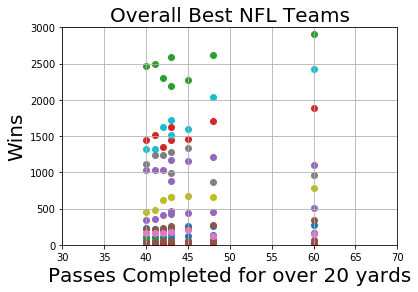

In [107]:
#First Plot, showing Passes over 20 yards
#If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
#_______QB List____________
plt.scatter(x1["#Wins"],
        yp20["#Pass20Plus"], marker="o")
plt.scatter(x1["#Wins"],
        yp40["#Pass40Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ypAtt["#PassAttempts"], marker="o")
plt.scatter(x1["#Wins"],
        ypCom["#PassCompletions"], marker="o")
plt.scatter(x1["#Wins"],
        ypPct["#PassPct"], marker="o",)
plt.scatter(x1["#Wins"],
        ypAPG["#PassAttemptsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        ypGY["#PassGrossYards"], marker="o")
plt.scatter(x1["#Wins"],
        ypNY["#PassNetYards"], marker="o")
plt.scatter(x1["#Wins"],
        ypYPA["#PassYardsPerAtt"], marker="o",)
plt.scatter(x1["#Wins"],
        ypYPG["#PassYardsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        ypTD["#PassTD"], marker="o")
plt.scatter(x1["#Wins"],
        ypTDPct["#PassTDPct"], marker="o")
plt.scatter(x1["#Wins"],
        ypInt["#PassInt"], marker="o",)
plt.scatter(x1["#Wins"],
        ypIntPct["#PassIntPct"], marker="o")
plt.scatter(x1["#Wins"],
        ypLng["#PassLng"], marker="o")
plt.scatter(x1["#Wins"],
        ypAvg["#PassAvg"], marker="o")
plt.scatter(x1["#Wins"],
        ypSack["#PassSacks"], marker="o",)
plt.scatter(x1["#Wins"],
        ypSackY["#PassSackY"], marker="o")
plt.scatter(x1["#Wins"],
        ypQBR["#QBRating"], marker="o")
# _______End QB List____________

# #_______Rush List____________
# plt.scatter(x1["#Wins"],
#         yRAtt["#RushAttempts"], marker="o",)
# plt.scatter(x1["#Wins"],
#         yRAPG["#RushAttemptsPerGame"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRYds["#RushYards"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRAvg["#RushAverage"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRYPG["#RushYardsPerGame"], marker="o",)
# plt.scatter(x1["#Wins"],
#         yRTD["#RushTD"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRLng["#RushLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         yR1st["#Rush1stDowns"], marker="o")
# plt.scatter(x1["#Wins"],
#         yR1Pct["#Rush1stDownsPct"], marker="o",)
# plt.scatter(x1["#Wins"],
#         yR20["#Rush20Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         yR40["#Rush40Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRFmb["#RushFumbles"], marker="o")
# #_______End Rush List____________

# #_______ Rec List____________
# plt.scatter(x1["#Wins"],
#         ypRec["#Receptions"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypRYds["#RecYards"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRAvg["#RecAverage"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRYPG["#RecYardsPerGame"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRecTD["#RecTD"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypRecLng["#RecLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec1st["#Rec1stDowns"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec20["#Rec20Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec40["#Rec40Plus"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypRecFmb["#RecFumbles"], marker="o")
# #_______End Rec List____________

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Rushing Plots

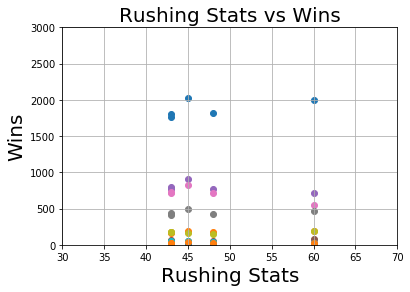

In [100]:
#_______Rush List____________
plt.scatter(x1["#Wins"],
        yRAtt["#RushAttempts"], marker="o",)
plt.scatter(x1["#Wins"],
        yRAPG["#RushAttemptsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        yRYds["#RushYards"], marker="o")
plt.scatter(x1["#Wins"],
        yRAvg["#RushAverage"], marker="o")
plt.scatter(x1["#Wins"],
        yRYPG["#RushYardsPerGame"], marker="o",)
plt.scatter(x1["#Wins"],
        yRTD["#RushTD"], marker="o")
plt.scatter(x1["#Wins"],
        yRLng["#RushLng"], marker="o")
plt.scatter(x1["#Wins"],
        yR1st["#Rush1stDowns"], marker="o")
plt.scatter(x1["#Wins"],
        yR1Pct["#Rush1stDownsPct"], marker="o",)
plt.scatter(x1["#Wins"],
        yR20["#Rush20Plus"], marker="o")
plt.scatter(x1["#Wins"],
        yR40["#Rush40Plus"], marker="o")
plt.scatter(x1["#Wins"],
        yRFmb["#RushFumbles"], marker="o")
#_______End Rush List____________
plt.grid(True)
plt.title("Rushing Stats vs Wins", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Rushing Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Receiving Plots

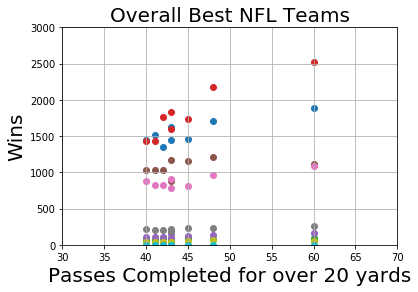

In [106]:
# #_______ Rec List____________
plt.scatter(x1["#Wins"],
        ypRec["#Receptions"], marker="o")
plt.scatter(x1["#Wins"],
        ypRYds["#RecYards"], marker="o")
plt.scatter(x1["#Wins"],
        ypRAvg["#RecAverage"], marker="o")
plt.scatter(x1["#Wins"],
        ypRYPG["#RecYardsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        ypRecTD["#RecTD"], marker="o",)
plt.scatter(x1["#Wins"],
        ypRecLng["#RecLng"], marker="o")
plt.scatter(x1["#Wins"],
        ypRec1st["#Rec1stDowns"], marker="o")
plt.scatter(x1["#Wins"],
        ypRec20["#Rec20Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ypRec40["#Rec40Plus"], marker="o",)
plt.scatter(x1["#Wins"],
        ypRecFmb["#RecFumbles"], marker="o")

#_______End Rec List____________

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Scoring Plots

### Turnover Plots

# Defensive Plots

In [110]:
#Passing
# "#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#SackYds", 
# "#TacklesForLoss", "#Interceptions", "#IntTD", "#IntYds", "#IntAverage", 
# "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#StuffYds",
# "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
# "#FumRecYds", "#FumTotalRec", "#FumTD"
#_______DEF List____________
ydTSolo = wins["#TackleSolo"]
ydTSolo = pd.DataFrame(ydTSolo)
ydTTot = wins["#TackleTotal"]
ydTTot = pd.DataFrame(ydTTot)
ydTAst = wins["#TackleAst"]
ydTAst = pd.DataFrame(ydTAst)
ydSck = wins["#Sacks"]
ydSck = pd.DataFrame(ydSck)
ydSckYds = wins["#SackYds"]
ydSckYds = pd.DataFrame(ydSckYds)
ydTFL = wins["#TacklesForLoss"]
ydTFL = pd.DataFrame(ydTFL)
ydInt = wins["#Interceptions"]
ydInt = pd.DataFrame(ydInt)
ydIntTD = wins["#IntTD"]
ydIntTD = pd.DataFrame(ydIntTD)
ydIntYds= wins["#IntYds"]
ydIntYds = pd.DataFrame(ydIntYds)
ydIntAvg = wins["#IntAverage"]
ydIntAvg = pd.DataFrame(ydIntAvg)
ydIntLng = wins["#IntLng"]
ydIntLng = pd.DataFrame(ydIntLng)
ydPassDef = wins["#PassesDefended"]
ydPassDef = pd.DataFrame(ydPassDef)
ydStuff = wins["#Stuffs"]
ydStuff = pd.DataFrame(ydStuff)
ydSfty = wins["#Safeties"]
ydSfty = pd.DataFrame(ydSfty)
ydStuffYds = wins["#StuffYds"]
ydStuffYds = pd.DataFrame(ydStuffYds)
ydFmb = wins["#Fumbles"]
ydFmb = pd.DataFrame(ydFmb)
ydFmbLst = wins["#FumLost"]
ydFmbLst = pd.DataFrame(ydFmbLst)
ydFmbFrc = wins["#FumForced"]
ydFmbFrc = pd.DataFrame(ydFmbFrc)
ydFmbRec = wins["#FumOwnRec"]
ydFmbRec = pd.DataFrame(ydFmbRec)
ydFmbOppRec = wins["#FumOppRec"]
ydFmbOppRec = pd.DataFrame(ydFmbOppRec)
ydFmbRecYds = wins["#FumRecYds"]
ydFmbRecYds = pd.DataFrame(ydFmbRecYds)
ydFmbTotRec = wins["#FumTotalRec"]
ydFmbTotRec = pd.DataFrame(ydFmbTotRec)
ydFmbTD = wins["#FumTD"]
ydFmbTD = pd.DataFrame(ydFmbTD)

#_______End DEF List____________

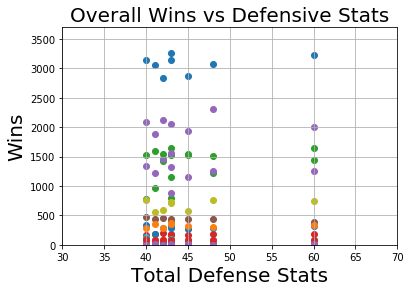

In [128]:
#First Plot, showing Passes over 20 yards
#If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
plt.scatter(x1["#Wins"],
        ydTSolo["#TackleSolo"], marker="o")
plt.scatter(x1["#Wins"],
        ydTTot["#TackleTotal"], marker="o")
plt.scatter(x1["#Wins"],
        ydTAst["#TackleAst"], marker="o")
plt.scatter(x1["#Wins"],
        ydSck["#Sacks"], marker="o")
plt.scatter(x1["#Wins"],
        ydSckYds["#SackYds"], marker="o",)
plt.scatter(x1["#Wins"],
        ydTFL["#TacklesForLoss"], marker="o")
plt.scatter(x1["#Wins"],
        ydInt["#Interceptions"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntTD["#IntTD"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntYds["#IntYds"], marker="o",)
plt.scatter(x1["#Wins"],
        ydIntAvg["#IntAverage"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntLng["#IntLng"], marker="o")
plt.scatter(x1["#Wins"],
        ydPassDef["#PassesDefended"], marker="o")
plt.scatter(x1["#Wins"],
        ydStuff["#Stuffs"], marker="o",)
plt.scatter(x1["#Wins"],
        ydSfty["#Safeties"], marker="o")
plt.scatter(x1["#Wins"],
        ydStuffYds["#StuffYds"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmb["#Fumbles"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbLst["#FumLost"], marker="o",)
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRec["#FumOwnRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbOppRec["#FumOppRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRecYds["#FumRecYds"], marker="o")
plt.scatter(x1["#Wins"], 
        ydFmbTotRec["#FumTotalRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbTD["#FumTD"], marker="o")
# _______End QB List____________

# ydTSolo["#TackleSolo"]
# ydTTot["#TackleTotal"]
# ydTAst["#TackleAst"]
# ydSck["#Sacks"]
# ydSckYds["#SackYds"]
# ydTFL["#TacklesForLoss"]
# ydInt["#Interceptions"]
# ydIntTD["#IntTD"]
# ydIntYds["#IntYds"]
# ydIntAvg["#IntAverage"]
# ydIntLng["#IntLng"]
# ydPassDef["#PassesDefended"]
# ydStuff["#Stuffs"]
# ydSfty["#Safeties"]
# ydStuffYds["#StuffYds"]
# ydFmb["#Fumbles"]
# ydFmbLst["#FumLost"]
# ydFmbFrc["#FumForced"]
# ydFmbRec["#FumOwnRec"]
# ydFmbOppRec["#FumOppRec"]
# ydFmbRecYds["#FumRecYds"]
# ydFmbTotRec["#FumTotalRec"]
# ydFmbTD["#FumTD"]

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs Defensive Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Total Defense Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Pass Def Plots

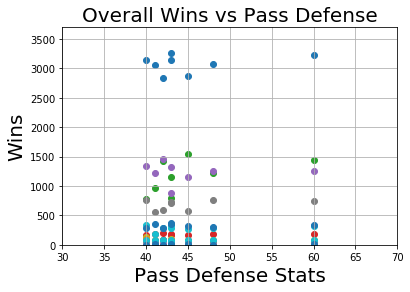

In [127]:
plt.scatter(x1["#Wins"],
        ydTSolo["#TackleSolo"], marker="o")
plt.scatter(x1["#Wins"],
        ydTTot["#TackleTotal"], marker="o")
plt.scatter(x1["#Wins"],
        ydTAst["#TackleAst"], marker="o")
plt.scatter(x1["#Wins"],
        ydSck["#Sacks"], marker="o")
plt.scatter(x1["#Wins"],
        ydSckYds["#SackYds"], marker="o",)

plt.scatter(x1["#Wins"],
        ydInt["#Interceptions"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntTD["#IntTD"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntYds["#IntYds"], marker="o",)
plt.scatter(x1["#Wins"],
        ydIntAvg["#IntAverage"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntLng["#IntLng"], marker="o")
plt.scatter(x1["#Wins"],
        ydPassDef["#PassesDefended"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmb["#Fumbles"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbLst["#FumLost"], marker="o",)
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRec["#FumOwnRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbOppRec["#FumOppRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRecYds["#FumRecYds"], marker="o")
plt.scatter(x1["#Wins"], 
        ydFmbTotRec["#FumTotalRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbTD["#FumTD"], marker="o")
plt.grid(True)
plt.title("Overall Wins vs Pass Defense", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Pass Defense Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Rush Def Plots

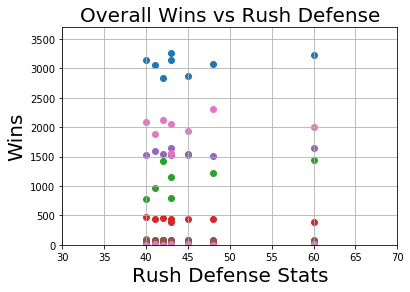

In [126]:
plt.scatter(x1["#Wins"],
        ydTSolo["#TackleSolo"], marker="o")
plt.scatter(x1["#Wins"],
        ydTTot["#TackleTotal"], marker="o")
plt.scatter(x1["#Wins"],
        ydTAst["#TackleAst"], marker="o")
plt.scatter(x1["#Wins"],
        ydTFL["#TacklesForLoss"], marker="o")
plt.scatter(x1["#Wins"],
        ydStuff["#Stuffs"], marker="o",)
plt.scatter(x1["#Wins"],
        ydSfty["#Safeties"], marker="o")
plt.scatter(x1["#Wins"],
        ydStuffYds["#StuffYds"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmb["#Fumbles"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbLst["#FumLost"], marker="o",)
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRec["#FumOwnRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbOppRec["#FumOppRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRecYds["#FumRecYds"], marker="o")
plt.scatter(x1["#Wins"], 
        ydFmbTotRec["#FumTotalRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbTD["#FumTD"], marker="o")
plt.grid(True)
plt.title("Overall Wins vs Rush Defense", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Rush Defense Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Scoring Def Plots

### Def Turnover Plots

# Special Teams Plots

In [ ]:
"#KB", "#KrRet", "#KrYds", "#KrAvg", "#KrLng","#KrTD", 
#                         "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 
#                         "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
#                         "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 
#                         "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",
#                         "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",
#                         "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", "#FgAtt50Plus",
#                         "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", "#XpAtt", 
#                         "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", "#KoYds",
#                         "#KoOOB", '#KoAvg', "#KoTB", "#KoRet", "#KoRetYds", 
#                         "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", "#Punts", 
#                         "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", "#PuntNetAvg", 
#                         "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", "#PuntIn20Pct", 
#                         "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", "#PuntRetYds", "#PuntRetAvg"
#_______QB List____________
plt.scatter(x1["#Wins"],
        yp20["#Pass20Plus"], marker="o")
plt.scatter(x1["#Wins"],
        yp40["#Pass40Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ypAtt["#PassAttempts"], marker="o")
plt.scatter(x1["#Wins"],
        ypCom["#PassCompletions"], marker="o")
plt.scatter(x1["#Wins"],
        ypPct["#PassPct"], marker="o",)
plt.scatter(x1["#Wins"],
        ypAPG["#PassAttemptsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        ypGY["#PassGrossYards"], marker="o")
plt.scatter(x1["#Wins"],
        ypNY["#PassNetYards"], marker="o")
plt.scatter(x1["#Wins"],
        ypYPA["#PassYardsPerAtt"], marker="o",)
plt.scatter(x1["#Wins"],
        ypYPG["#PassYardsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        ypTD["#PassTD"], marker="o")
plt.scatter(x1["#Wins"],
        ypTDPct["#PassTDPct"], marker="o")
plt.scatter(x1["#Wins"],
        ypInt["#PassInt"], marker="o",)
plt.scatter(x1["#Wins"],
        ypIntPct["#PassIntPct"], marker="o")
plt.scatter(x1["#Wins"],
        ypLng["#PassLng"], marker="o")
plt.scatter(x1["#Wins"],
        ypAvg["#PassAvg"], marker="o")
plt.scatter(x1["#Wins"],
        ypSack["#PassSacks"], marker="o",)
plt.scatter(x1["#Wins"],
        ypSackY["#PassSackY"], marker="o")
plt.scatter(x1["#Wins"],
        ypQBR["#QBRating"], marker="o")
# _______End QB List____________

# #_______Rush List____________
# plt.scatter(x1["#Wins"],
#         yRAtt["#RushAttempts"], marker="o",)
# plt.scatter(x1["#Wins"],
#         yRAPG["#RushAttemptsPerGame"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRYds["#RushYards"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRAvg["#RushAverage"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRYPG["#RushYardsPerGame"], marker="o",)
# plt.scatter(x1["#Wins"],
#         yRTD["#RushTD"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRLng["#RushLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         yR1st["#Rush1stDowns"], marker="o")
# plt.scatter(x1["#Wins"],
#         yR1Pct["#Rush1stDownsPct"], marker="o",)
# plt.scatter(x1["#Wins"],
#         yR20["#Rush20Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         yR40["#Rush40Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         yRFmb["#RushFumbles"], marker="o")
# #_______End Rush List____________

# #_______ Rec List____________
# plt.scatter(x1["#Wins"],
#         ypRec["#Receptions"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypRYds["#RecYards"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRAvg["#RecAverage"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRYPG["#RecYardsPerGame"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRecTD["#RecTD"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypRecLng["#RecLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec1st["#Rec1stDowns"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec20["#Rec20Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec40["#Rec40Plus"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypRecFmb["#RecFumbles"], marker="o")
# #_______End Rec List____________

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### XP/FG Plots

### Punt Plots

### Kickoff Plots

### PR Plots

### KOR Plots